<a href="https://colab.research.google.com/github/chohoon901/MachineLearning/blob/main/sunghuncho/ch08_ML_02_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_sunghuncho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# pandas 소수점 둘째자리 까지만
pd.options.display.float_format = '{:.2f}'.format

In [94]:
# https://www.kaggle.com/competitions/titanic/data
train = pd.read_csv("https://github.com/BigData23th/Data/raw/main/titanic_train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [12]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


In [13]:
# 칼럼(열)들의 결측치 여부와 데이터타입 확인
# df.info()
train.info() # 전체 데이터 891행 -> 891보다 작은 경우에는 '결측치' -> 채우는 전처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**종속변수**
* Survived : 생존 여부 (0,1)

In [14]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**독립변수**
* Pclass : 티켓 클래스
* SibSp : 동승한 형제(Siblings)와 배우자(Spouse) 수
* Parch : 동승한 부모(Parents)와 자식들(Children) 수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 호실
* Embarked : 승선한 항구

In [15]:
train.describe() # 수치형 변수들 통계치

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [16]:
train.describe(include='O') # 범주형 변수

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 상관관계 파악

In [17]:
# correlation : 상관관계
# df.corr()
# 상관관계 강도 해석 (절댓값)
# 0.2 이하 : 상관관계가 거의 없음
# 0.2 ~ 0.4 : 낮은 상관관계
# 0.4 ~ 0.6 : 중간 상관관계
# 0.6 ~ 0.8 : 높은 상관관계
# 0.8 이상 : 매우 높은 상관관계
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


<Axes: >

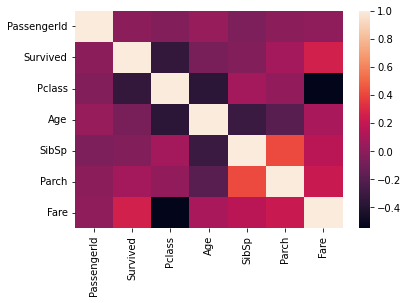

In [18]:
# corr 상관관계 -> 수치형 변수들끼리만 표시
sns.heatmap(train.corr())

<Axes: >

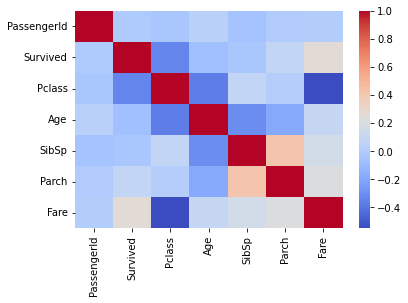

In [19]:
sns.heatmap(train.corr(),cmap='coolwarm')

<Axes: >

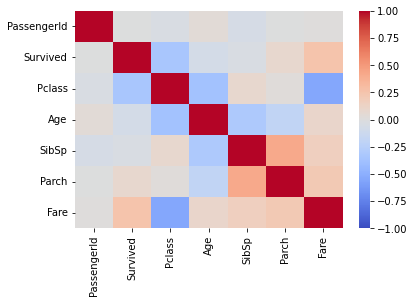

In [20]:
# value 최소는 -1, 최대는 1
sns.heatmap(train.corr(),cmap='coolwarm',vmin=-1,vmax=1)

<Axes: >

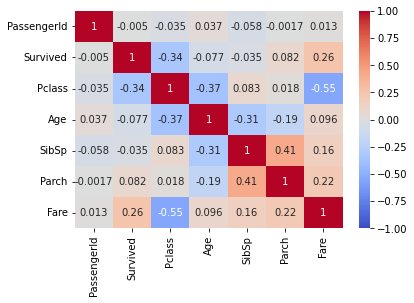

In [21]:
# 수치를 같이 표시 (annot=True)
sns.heatmap(train.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)

In [ ]:
# inplace -> 다시 대입해주지 않아도 원본에 영향

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


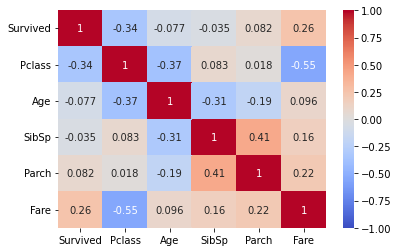

In [ ]:
# 수치를 같이 표시 (annot=True)


# 전처리

## 결측치 처리
* 결측치 -> 비어있는 값 -> (Pandas) NaN
범주형 변수 처리 ? -> 결측치

In [95]:
# 결측치 갯수 확인
train.isnull()
train.isnull().sum()
train.Embarked.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

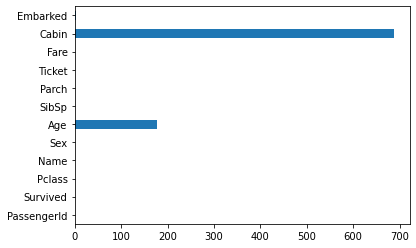

In [96]:
# kind=bar, kind=barh
train.isnull().sum().plot(kind='barh')
plt.show()

In [97]:
# 결측치 처리는 얼마나 결측치가 (비중이) 많은지에 따라 결정
# 1. 결측치가 10% 미만.
# 1-1. 비율이 얼마 없으면 가장 최빈값 혹은 평균치로 덮어씌워버림
# 1-2. (중요한 데이터면) 행을 삭제해버림
# 2. 20~30% => 임의로 넣기에는 애매하고, 그렇다고 빈 값으로 처리해버리기는 아까움
# 2-1. 그룹별로 통계치를 만들어서 해당 그룹에다가 넣음
# 2-2. '비어있다'를 하나의 항목으로
# 3. 70~80% 비어있음
# 3-1. '비어있다'를 하나의 항목으로
# 3-2. 해당 열을 삭제함
train.isnull().sum() / len(train)

PassengerId   0.00
Survived      0.00
Pclass        0.00
Name          0.00
Sex           0.00
Age           0.20
SibSp         0.00
Parch         0.00
Ticket        0.00
Fare          0.00
Cabin         0.77
Embarked      0.00
dtype: float64

### Embarked

In [98]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: >

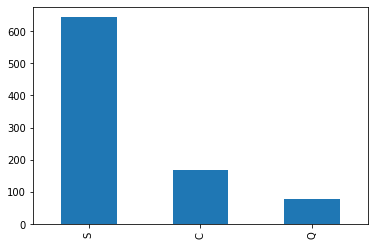

In [99]:
# train.Embarked.value_counts()
train.Embarked.value_counts().plot(kind='bar')

In [100]:
# 결측치를 채우는 방법
train.Embarked = train.Embarked.fillna("S")

In [101]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Cabin

In [102]:
train.Cabin.unique()# C, E... 접두사만 남기고 + 빈 애들은 X 같은 걸로 처리를 해서 사용

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [103]:
# train = train.drop('Cabin', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)

In [ ]:
train

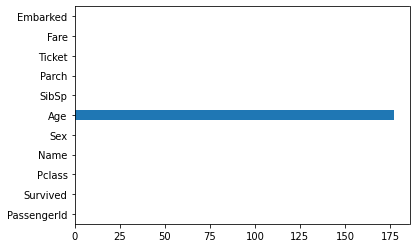

In [105]:
train.isnull().sum().plot(kind='barh')
plt.show()

### Age

<Axes: ylabel='Frequency'>

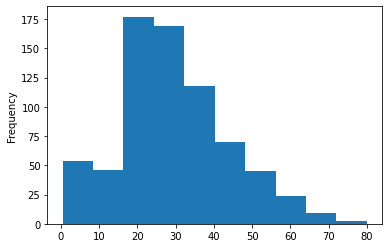

In [106]:
train.Age.plot(kind='hist')

In [107]:
#1. 전체 평균
train.Age.mean()

29.69911764705882

In [108]:
#2. 비어있음 - 결측치 (선형회귀 기반에 선형회귀, 로지스틱 X)


In [109]:
# 반복되는 구조 (경칭.)
# (abcd). <- 정규표현식에서는 group
# .(0~1) => ([A-Za-z]+)\. (1개~무한히)
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [110]:
#3. 다른 특정한 범주형이나 그룹들을 추려내서 해당 관련된 평균
# train.Name -> '경칭(Title)'을 추출해서 해당 경칭들 간의 평균 나이를 결측치에 넣어주겠다
# fare -> ? / 비슷한 가족구성? ... => 가설 => 넣어보면. ==> 정확도 Accuracy
# 열.str : 문자열과 관련된 메소드들 사용할 수 있게
# str.extract(정규표현식) => 표현식에 맞는 데이터들을 추출
# https://regexr.com/
# https://regexone.com/
# https://moonsupport.tistory.com/173
# https://yaeyang0629.tistory.com/entry/%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D-%EA%B0%9C%EB%85%90-%EB%B0%8F-%EC%82%AC%EC%9A%A9%EB%B2%95

train['Title'] = train.Name.str.extract(',\s*([A-Za-z]+)\.')
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C,Mr


In [111]:
train.Name.str.extract(",\s*([A-Za-z]+)\.") # 반복되는 문자열 요소를 지닌 리스트로 변환(.str)
# 정규표현식 : , 로 시작하고 \s(\s:공백, \S: 공백이 아닌 문자) *(0개 이상) +(1개 이상) .(0~1)
# [A-Za-z] [A-Z] [a-z] [가-힣] [A-Za-z가-힣]
# 

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [112]:
train[train.Title=="Lady"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.00,1,0,11755,39.60,C,Lady


In [113]:
train.Title.value_counts()
# 1. 특정 데이터들의 특성을 반영해서 Title -> 더 큰 집단에 소속
# 2. 나머지는 모두 Else 또는 Rare # 10개보다 작은 타이틀은 모두 Rare

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [114]:
# 10건 미만인 title 고유값들을 선택
vc=train.Title.value_counts()
rare_title=vc[vc<10]
rare_title

Dr          7
Rev         6
Major       2
Mlle        2
Col         2
Don         1
Mme         1
Ms          1
Lady        1
Sir         1
Capt        1
Jonkheer    1
Name: Title, dtype: int64

In [115]:
# 희귀 경칭 리스트
# series -> list / list(...), to_list()
rare_title.value_counts()

1    7
2    3
7    1
6    1
Name: Title, dtype: int64

In [116]:
# Title -> [...] 속한 값들을 바꿔주는. => replace
train["Title"]=train["Title"].replace(rare_title.index,"Rare")
train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       26
Name: Title, dtype: int64

In [117]:
train["Title"]=train["Title"].fillna("Rare")
train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [118]:
# 1. 타이틀 그룹별 연령 평균
# 2. age 결측치가 있다면 -> title을 기반으로 연령 평균
title_age_mean=train.groupby(["Title"])["Age"].mean()
title_age_mean

Title
Master    4.57
Miss     21.77
Mr       32.37
Mrs      35.90
Rare     42.38
Name: Age, dtype: float64

In [119]:
# 행 조건, 열 조건 (인덱스)
train.loc[train.Title=="Mr","Age"]

0     22.00
4     35.00
5       NaN
6     54.00
12    20.00
       ... 
881   33.00
883   28.00
884   25.00
889   26.00
890   32.00
Name: Age, Length: 517, dtype: float64

PassengerId
1     22.00
5     35.00
6       NaN
7     54.00
13    20.00
       ... 
882   33.00
884   28.00
885   25.00
890   26.00
891   32.00
Name: Age, Length: 517, dtype: float64

In [120]:
title_age_mean["Mr"]

32.368090452261306

In [ ]:
train

In [124]:
# for문으로 고유값들을 모두 검색하고, 해당 타이틀과 일치하는지를 검색한다음 fillna, inplace True를 사용해서 결측치를 처리
for t in train['Title'].unique(): # 고유값 title t
    # 행 조건 -> Age가 결측치면서, Title이 t와 일치하는 행들 / Age에다가 title_age_mean t값으로 조회되는 값을 넣어주겠다
    # print(t)
    train.loc[train.Title == t, 'Age'].fillna(title_age_mean[t], inplace=True)

In [ ]:
# 고유값 
# 행 조건 -> Age가 결측치면서, Title이 t와 일치하는 행들 / Age에다가 title_age_mean t값으로 조회되는 값을 넣어주겠다
# apply를 사용해서 해당 행의 age값이 nan인지를 np.isnan으로 검사해서, 삼항연산자로 평균값을 넣어 결측치로 처리
# train_copy.apply(lambda x:x.Title, axis=1)
train.apply(lambda x: title_age_mean[x.Title] if np.isnan(x.Age) else x.Age, axis=1)

In [128]:
for t in train['Title'].unique(): # 고유값 title t
    # 행 조건 -> Age가 결측치면서, Title이 t와 일치하는 행들 / Age에다가 title_age_mean t값으로 조회되는 값을 넣어주겠다
    # print(t)
    train.loc[train.Age.isnull() & (train.Title == t), 'Age'] = title_age_mean[t]

In [129]:
train.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

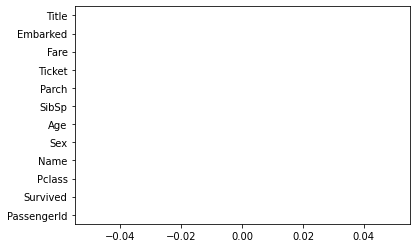

In [130]:
train.isnull().sum().plot(kind='barh')
plt.show()

In [68]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [ ]:
train.Name.unique()

In [ ]:
train.Ticket.unique()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Title'],
      dtype='object')

In [131]:
train.drop(['Ticket', 'Name', 'Title'], axis=1, inplace=True)

In [85]:
train.Survived.isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [89]:
train.PassengerId.isnull().value_counts()

False    891
Name: PassengerId, dtype: int64

In [134]:
# Sex, Embarked : Object
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [133]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare  Sex_male  \
0              1         0       3 22.00      1      0  7.25         1   
1              2         1       1 38.00      1      0 71.28         0   
2              3         1       3 26.00      0      0  7.92         0   
3              4         1       1 35.00      1      0 53.10         0   
4              5         0       3 35.00      0      0  8.05         1   
..           ...       ...     ...   ...    ...    ...   ...       ...   
886          887         0       2 27.00      0      0 13.00         1   
887          888         1       1 19.00      0      0 30.00         0   
888          889         0       3 21.77      1      2 23.45         0   
889          890         1       1 26.00      0      0 30.00         1   
890          891         0       3 32.00      0      0  7.75         1   

     Embarked_Q  Embarked_S  
0             0           1  
1             0    

## 훈련셋.시험셋

# 모델링

In [ ]:
X,y=train.drop("Survived",axis=1),train["Survived"]
X,y

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=23)

In [138]:
model=LogisticRegression()

In [139]:
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1])

In [76]:
# LinearRegression : 회귀 -> 연속형 변수 예측 문제
# LogisticRegression : 분류 -> 이진 분류 문제
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0])

In [ ]:
# probability
model.predict_proba(X_test)

# 평가

In [142]:
# 분류를 제대로 맞췄는지 점수를 알려주는 함수
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8100558659217877

In [143]:
# pd.Series(model.coef_, index = X.columns)
model.coef_

array([[ 1.10931960e-03, -4.99865916e-01, -1.25200916e-02,
        -8.11623196e-02, -3.89310764e-01,  9.21271802e-03,
        -2.68810029e+00,  1.51531470e-01,  1.56515598e-01]])

In [144]:
pd.Series(model.coef_, index = X.columns)

ValueError: ignored

(8,)

Pclass       -1.25
Age          -0.04
SibSp        -0.23
Parch        -0.07
Fare          0.00
Sex_male     -2.58
Embarked_Q    0.29
Embarked_S   -0.30
dtype: float64

**피처 엔지니어링 (Feature Engineering)**
* 기존 데이터를 손보아 더 나은 변수를 만드는 기법
    * 예) 더미 변수
* 도메인 지식의 활용이 중요
    * 데이터에 사전 지식이 있으면 어떤 변수를 어떻게 바꾸면 더 나은 피처를 얻을 수 있을지 파악 가능
    * 도메인 지식을 바탕으로 정확한 목적을 가지고 수행하는 피처 엔지니어링이 더욱 효율적

**다중공선성(Multicolinearity) 문제**
* 선형 회귀 분석, 로지스틱 회귀 분석 등 선형 모델에서 **독립변수 사이에 상관관계가 높은 때에 발생하는 문제**
* 특정 독립변수 간의 상관관계가 매우 높다면 종속변수의 변화 요인이 정확히 어떤 변수 때문인지 불투명해짐
* 선형 모델은 독립변수 간의 독립성을 전제로 하기 때문에, 다중공선성 문제를 해결해주는 것이 좋음

**해결책**
* 상관관계가 높은 변수 중 하나를 제거
* 둘을 모두 포괄시키는 새로운 변수 생성
* PCA 등의 방법으로 차원 축소를 수행
    * **PCA**(Principal Component Analysis, 주성분 분석)

**로지스틱 회귀 `Logistic Regression`**
* 로지스틱 함수 Logistic function 를 사용하여 선형 회귀 분석의 직선 형태를 1과 0에 한없이 가까워지는 곡선 형태로 바꿔줌
![Linear Regression VS Logistic Regression](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)
* 기본적으로 0.5를 기준으로 1과 0으로 변환시킨 값을 보여줌

In [ ]:
# 전처리
def pre_processing(df):
    #0. Fare 결측치 처리
    #1. 결측치 embarked를 S로 채워줌
    #2. 결측치 age를 title 기준의 평균값으로 채워줌
    #3. cabin, ticket, name, title
    #4. 범주형 변수 -> pd.get_dummies
    return

# 제출하기

In [ ]:
test = pd.read_csv("https://github.com/BigData23th/Data/raw/main/titanic_test.csv",
                   index_col='PassengerId')
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.50,0,0,3701,NaN,NaN,S


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.50,0,0,7.83,1,1,0
1,893,3,47.00,1,0,7.00,0,0,1
2,894,2,62.00,0,0,9.69,1,1,0
3,895,3,27.00,0,0,8.66,1,0,1
4,896,3,22.00,1,1,12.29,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27,0,0,8.05,1,0,1
414,1306,1,39.00,0,0,108.90,0,0,0
415,1307,3,38.50,0,0,7.25,1,0,1
416,1308,3,30.27,0,0,8.05,1,0,1


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv', index=False)

from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>